<a href="https://colab.research.google.com/github/tawfiqahmad88/tawfiqahmad88/blob/main/Brain_Tumor_Progression__ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Brain Tumor Progression** 
**SUPERVISED BY Dr. Öğr : Fidan KAYA GÜLAĞIZ**

**Prepared By : TAWFIQ AL AHMAD** 

# step 1: Installation and setup

```



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: reading the dataset 



In [ ]:
dataset = pd.read_csv('scans_data.csv')
dataset = dataset[['ImageOrientationPatient0','ImageOrientationPatient1','ImageOrientationPatient2','ImageOrientationPatient3','ImageOrientationPatient4','ImageOrientationPatient5','ImagePositionPatient0','ImagePositionPatient1','ImagePositionPatient2','WindowCenter','WindowWidth','SeriesDescription']]

#step 3: Data preprocessing


In [ ]:
dataset.shape

(8798, 12)

In [ ]:
#checking the null values in each column
dataset.isnull().sum()

ImageOrientationPatient0    0
ImageOrientationPatient1    0
ImageOrientationPatient2    0
ImageOrientationPatient3    0
ImageOrientationPatient4    0
ImageOrientationPatient5    0
ImagePositionPatient0       0
ImagePositionPatient1       0
ImagePositionPatient2       0
WindowCenter                0
WindowWidth                 0
SeriesDescription           0
dtype: int64

In [ ]:
dataset.shape

(8798, 12)

In [ ]:
dataset['SeriesDescription'].value_counts

<bound method IndexOpsMixin.value_counts of 0       sRCBV_reg
1       sRCBV_reg
2       sRCBV_reg
3       sRCBV_reg
4       sRCBV_reg
          ...    
8793    T1pre_reg
8794    T1pre_reg
8795    T1pre_reg
8796    T1pre_reg
8797    T1pre_reg
Name: SeriesDescription, Length: 8798, dtype: object>

C:\Users\ghayt\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeriesDescription', ylabel='count'>

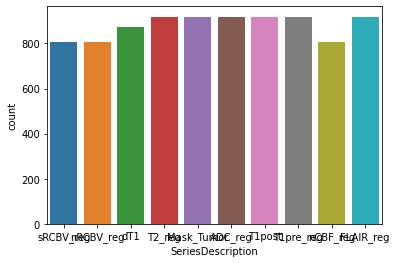

In [ ]:
sns.countplot(dataset['SeriesDescription'],label='count')

In [ ]:
#independent variables(matrix of features)
x= dataset.drop(labels=['SeriesDescription'], axis=1)
#dependent variables
y=dataset['SeriesDescription']

In [ ]:
x.head()

,ImageOrientationPatient0,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,ImagePositionPatient0,ImagePositionPatient1,ImagePositionPatient2,WindowCenter,WindowWidth
0,0.999509,0.002133,0.031265,2.254845e-10,0.997682,-0.068049,-95.654477,-104.776783,-38.473867,17130.140625,34260.28125
1,0.999509,0.002133,0.031265,2.254845e-10,0.997682,-0.068049,-95.043385,-106.103081,-57.919107,17130.140625,34260.28125
2,0.999509,0.002133,0.031265,2.254845e-10,0.997682,-0.068049,-95.450780,-105.218882,-44.955614,17130.140625,34260.28125
3,0.999509,0.002133,0.031265,2.254845e-10,0.997682,-0.068049,-99.524722,-96.376894,84.679342,17130.140625,34260.28125
4,0.999509,0.002133,0.031265,2.254845e-10,0.997682,-0.068049,-96.876659,-102.124186,0.416620,17130.140625,34260.28125


In [ ]:
y.head()

0    sRCBV_reg
1    sRCBV_reg
2    sRCBV_reg
3    sRCBV_reg
4    sRCBV_reg
Name: SeriesDescription, dtype: object

In [ ]:
#Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
label_1= LabelEncoder()
y=label_1.fit_transform(y)

In [ ]:
y

array([9, 9, 9, ..., 4, 4, 4])

In [ ]:
x.shape,y.shape

((8798, 11), (8798,))

In [ ]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
x_train.shape,x_test.shape

((7038, 11), (1760, 11))

# Step4: building a function for the models used in this project:

In [ ]:
def models(x_train,y_train):
  #Using Logistic Regression Algorithm
  from sklearn.linear_model import LogisticRegression
  logre=LogisticRegression(random_state=0)
  logre.fit(x_train,y_train)
  #Using KNeighborClassifier method
  from sklearn.neighbors import KNeighborsClassifier
  KNC=KNeighborsClassifier(n_neighbors=5)
  KNC.fit(x_train,y_train)
  #Using SVM method
  from sklearn.svm import SVC
  classifier=SVC(kernel='linear', random_state=0)
  classifier.fit(x_train,y_train)
  #Using SVM method
  from sklearn.svm import SVC
  classifier1=SVC(kernel='rbf', random_state=0)
  classifier1.fit(x_train,y_train)
  #decisiontree
  from sklearn.tree import DecisionTreeClassifier
  DTC=DecisionTreeClassifier(criterion='entropy', random_state=0)
  DTC.fit(x_train,y_train)
  #RandomForest
  from sklearn.ensemble import RandomForestClassifier
  rforest=RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
  rforest.fit(x_train,y_train)
  print("Accuracy of KNeighborsClassifier model:", KNC.score(x_test, y_test))
  print("Accuracy of LogisticRegression model:", logre.score(x_test, y_test))
  print("Accuracy of SVC linear model:", classifier.score(x_test, y_test))
  print("Acuuracy of SVC rbf model :", classifier1.score(x_test, y_test))
  print("Acuuracy of DecisionTreeClassifier model:", DTC.score(x_test, y_test))
  print("Acuuracy of RandomForestClassifier model:", rforest.score(x_test, y_test))
  return KNC,logre,classifier,classifier1,DTC,rforest


#Step5: Model prediction, confusion matrix and accuracy score of the models



In [ ]:
model=models(x_train,y_train)

C:\Users\ghayt\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of KNeighborsClassifier model: 0.7880681818181818
Accuracy of LogisticRegression model: 0.5306818181818181
Accuracy of SVC linear model: 0.5892045454545455
Acuuracy of SVC rbf model : 0.46761363636363634
Acuuracy of DecisionTreeClassifier model: 0.975
Acuuracy of RandomForestClassifier model: 0.9738636363636364


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
for i in range(len(model)):
  print('MOdel',i)
  y_pred=model[i].predict(x_test)
  print('prediction:',y_pred)
  cm=confusion_matrix(y_test,y_pred)
  print('The confusion matrix is:')
  print(cm)

MOdel 0
prediction: [2 4 5 ... 1 0 1]
The confusion matrix is:
[[175   0   0   0   6   0   0   0   0   0]
 [  0 172   0   0  14   0   0   0   0   0]
 [  0   0 167   0   0   0   0   0   1   0]
 [  7  19   0  92  36  41   0   0   0   0]
 [  1  14   0   1 154   0   0   0   0   0]
 [  0   7   0   2   2 188   0   0   0   0]
 [  0   0   0   0   0   0 171   0   0   0]
 [  0   0   7   0   0   0   0  69  92   0]
 [  0   0  12   0   0   0   0 111  52   0]
 [  0   0   0   0   0   0   0   0   0 147]]
MOdel 1
prediction: [2 3 1 ... 1 0 5]
The confusion matrix is:
[[125   0   0  21  22  13   0   0   0   0]
 [  1 133   0  13   6  33   0   0   0   0]
 [  0   0 168   0   0   0   0   0   0   0]
 [ 51  74   0  39  20  11   0   0   0   0]
 [ 46  65   0  22   8  29   0   0   0   0]
 [ 32  77   0  16  51  23   0   0   0   0]
 [  0   0   0   0   0   0 171   0   0   0]
 [  0   0  26   0   0   0   0   0 142   0]
 [  0   0  55   0   0   0   0   0 120   0]
 [  0   0   0   0   0   0   0   0   0 147]]
MOdel 2
pred